In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,NaN
5,Afghanistan,2013,2264.317575,NaN


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [7]:
gdp_df.shape

(6608, 4)

gdp_df has 6608 rows and 4 columns

In [8]:
internet_df.shape

(4675, 4)

internet_df has 4675 rows and 4 columns

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6598,Zimbabwe,1997,3580.048793,NaN
6599,Zimbabwe,1996,3520.430146,NaN
6600,Zimbabwe,1995,3226.413930,NaN
6601,Zimbabwe,1994,3263.934978,NaN
6602,Zimbabwe,1993,3033.504852,NaN
6603,Zimbabwe,1992,3054.889178,NaN
6604,Zimbabwe,1991,3426.598094,NaN
6605,Zimbabwe,1990,3324.348171,NaN
6606,footnoteSeqID,Footnote,NaN,NaN
6607,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4665,170,Refers to the total population.,NaN,NaN
4666,171,Internet Dial-up customers.,NaN,NaN
4667,172,Population age 16+ using the Internet in the l...,NaN,NaN
4668,173,Population age 16+ using internet in the last ...,NaN,NaN
4669,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


In [13]:
gdp_df.drop(columns=['Value Footnotes'], axis=1, inplace=True)

In [14]:
internet_df.drop(columns=['Value Footnotes'], axis=1, inplace=True)

In [15]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [16]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [17]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,2190.240321
1,Afghanistan,2017,2202.570851
2,Afghanistan,2016,2200.764487
3,Afghanistan,2015,2212.750899
4,Afghanistan,2014,2249.253738


In [18]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [19]:
# clear out the 180 rows not containing data, footnote data
internet_df = internet_df[~np.isnan(internet_df["Internet_Users_Pct"])]

In [20]:
# clear out the 2 rows not containing data, footnote data
gdp_df = gdp_df[~np.isnan(gdp_df["GDP_Per_Capita"])]

In [21]:
gdp_list = gdp_df.Country.unique().tolist()
internet_list = internet_df.Country.unique().tolist()

In [22]:
print(' --Countries in internet dataframe that are not in GDP dataframe-- ')
print(np.setdiff1d(internet_list, gdp_list))
# number of countries in internet dataframe that are not in GDP dataframe, some of these are simply different spellings
print("Count of countries:", len(np.setdiff1d(internet_list, gdp_list)))

 --Countries in internet dataframe that are not in GDP dataframe-- 
['American Samoa' 'Andorra' 'Bahamas' 'Bermuda' 'Brunei Darussalam'
 'Cape Verde' 'Central African Rep.' 'Congo (Democratic Republic of the)'
 "Cote d'Ivoire" 'Cuba' "Dem. People's Rep. of Korea" 'Dominican Rep.'
 'Eritrea' 'Faroe Islands' 'French Guiana' 'French Polynesia' 'Gambia'
 'Gibraltar' 'Greenland' 'Guam' 'Guernsey' 'Hong Kong, China'
 'Iran (Islamic Rep. of)' 'Jersey' 'Korea (Rep. of)' 'Kyrgyzstan'
 'Lao P.D.R.' 'Liechtenstein' 'Macao, China' 'Micronesia (Fed. States of)'
 'Monaco' 'Netherlands Antilles' 'New Caledonia'
 'Northern Marianas Islands' 'Palestine' 'Saint Kitts and Nevis'
 'Saint Lucia' 'Sao Tome and Principe' 'Somalia' 'South Sudan' 'Swaziland'
 'Syria' 'T.F.Y.R. Macedonia' 'Venezuela' 'Viet Nam'
 'Virgin Islands (U.S.)' 'Yemen']
Count of countries: 47


In [23]:
print(' --Countries in GDP dataframe that are not in internet dataframe-- ')
print(np.setdiff1d(gdp_list, internet_list))
print("Count of countries:", len(np.setdiff1d(gdp_list, internet_list)))

 --Countries in GDP dataframe that are not in internet dataframe-- 
['Arab World' 'Brunei' 'Cabo Verde' 'Caribbean small states'
 'Central African Republic' 'Central Europe and the Baltics' 'CuraÃ§ao'
 "CÃ´te d'Ivoire" 'Dem. Rep. Congo' 'Dominican Republic'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (IDA & IBRD)'
 'East Asia & Pacific (excluding high income)' 'Eswatini' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (IDA & IBRD)'
 'Europe & Central Asia (excluding high income)' 'European Union'
 'Heavily indebted poor countries (HIPC)' 'High income'
 'Hong Kong SAR, China' 'IBRD only' 'IDA & IBRD total' 'IDA blend'
 'IDA only' 'IDA total' 'Iran' 'Korea' 'Kosovo' 'Kyrgyz Republic'
 'Lao PDR' 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (IDA & IBRD)'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income'

In [24]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer', on=['Country', 'Year'], indicator = True)

In [25]:
gdp_and_internet_use.shape

(7664, 5)

In [26]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
0,Afghanistan,2018,2190.240321,NaN,left_only
1,Afghanistan,2017,2202.570851,NaN,left_only
2,Afghanistan,2016,2200.764487,NaN,left_only
3,Afghanistan,2015,2212.750899,NaN,left_only
4,Afghanistan,2014,2249.253738,6.39,both


In [27]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
7659,Yemen,1999,NaN,0.056629,right_only
7660,Yemen,1998,NaN,0.023323,right_only
7661,Yemen,1997,NaN,0.015025,right_only
7662,Yemen,1996,NaN,0.000621,right_only
7663,Yemen,1990,NaN,0.000000,right_only


In [28]:
gi_subset = gdp_and_internet_use[gdp_and_internet_use["Year"].isin(["2004","2009","2014"])]

In [29]:
gi_subset.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
4,Afghanistan,2014,2249.253738,6.390000,both
9,Afghanistan,2009,1881.777626,3.550000,both
14,Afghanistan,2004,1284.127338,0.105809,both
21,Albania,2014,11828.232264,60.100000,both
26,Albania,2009,10528.778102,41.200000,both


In [30]:
gi_subset.shape

(830, 5)

In [31]:
gdp_internet_2004_ss = gi_subset[gi_subset["Year"] == "2004"]

In [32]:
gdp_internet_2009_ss = gi_subset[gi_subset["Year"] == "2009"]

In [33]:
gdp_internet_2014_ss = gi_subset[gi_subset["Year"] == "2014"]

In [34]:
gdp_internet_2014_ss[gdp_internet_2014_ss.Internet_Users_Pct == gdp_internet_2014_ss.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
2507,Iceland,2014,49911.069825,98.16,both


In [35]:
gdp_internet_2014_ss[gdp_internet_2014_ss.Internet_Users_Pct == gdp_internet_2014_ss.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
6838,Dem. People's Rep. of Korea,2014,NaN,0.0,right_only


In [36]:
# Since Dem. Peopls's Rep. of Korea gives a 0 for an answer the next highest number 
#  might be what we are looking for
gdp_internet_2014_ss.sort_values(by="Internet_Users_Pct").iloc[1]

Country                  Eritrea
Year                        2014
GDP_Per_Capita               NaN
Internet_Users_Pct          0.99
_merge                right_only
Name: 6896, dtype: object

In [37]:
gdp_internet_2009_ss[gdp_internet_2009_ss.Internet_Users_Pct == gdp_internet_2009_ss.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
2512,Iceland,2009,48428.312438,93.0,both


In [38]:
gdp_internet_2009_ss[gdp_internet_2009_ss.Internet_Users_Pct == gdp_internet_2009_ss.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
6842,Dem. People's Rep. of Korea,2009,NaN,0.0,right_only


In [39]:
# Since Dem. Peopls's Rep. of Korea gives a 0 for an answer the next highest number 
#  might be what we are looking for
gdp_internet_2009_ss.sort_values(by="Internet_Users_Pct").iloc[1]

Country               Timor-Leste
Year                         2009
GDP_Per_Capita            2724.83
Internet_Users_Pct       0.185252
_merge                       both
Name: 5983, dtype: object

In [40]:
gdp_internet_2004_ss[gdp_internet_2004_ss.Internet_Users_Pct == gdp_internet_2004_ss.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
5785,Sweden,2004,45029.814344,83.89,both


In [41]:
gdp_internet_2004_ss[gdp_internet_2004_ss.Internet_Users_Pct == gdp_internet_2004_ss.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
6847,Dem. People's Rep. of Korea,2004,NaN,0.0,right_only


In [42]:
# Since Dem. Peopls's Rep. of Korea gives a 0 for an answer the next highest number 
#  might be what we are looking for
gdp_internet_2004_ss.sort_values(by="Internet_Users_Pct").iloc[1]

Country                 Myanmar
Year                       2004
GDP_Per_Capita          1696.88
Internet_Users_Pct    0.0243374
_merge                     both
Name: 4166, dtype: object

In [43]:
gdp_internet_2014_ss[gdp_internet_2014_ss.GDP_Per_Capita == gdp_internet_2014_ss.GDP_Per_Capita.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
3564,"Macao SAR, China",2014,156514.13385,NaN,left_only


In [44]:
gdp_internet_2014_ss[gdp_internet_2014_ss.GDP_Per_Capita == gdp_internet_2014_ss.GDP_Per_Capita.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
983,Central African Republic,2014,822.610458,NaN,left_only


In [45]:
gdp_internet_2014_ss[gdp_internet_2014_ss['Country'] == 'United States']

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
6324,United States,2014,57313.859702,87.36,both


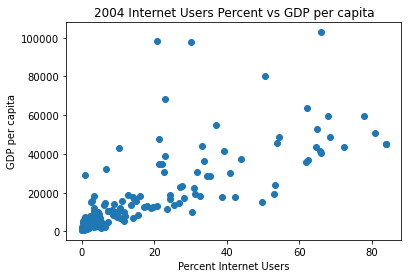

In [46]:
plt.scatter(x = 'Internet_Users_Pct', y ='GDP_Per_Capita', data = gdp_internet_2004_ss)
plt.xlabel('Percent Internet Users')
plt.ylabel('GDP per capita')
plt.title('2004 Internet Users Percent vs GDP per capita');

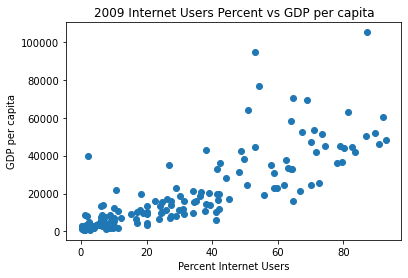

In [47]:
plt.scatter(x = 'Internet_Users_Pct', y ='GDP_Per_Capita', data = gdp_internet_2009_ss)
plt.xlabel('Percent Internet Users')
plt.ylabel('GDP per capita')
plt.title('2009 Internet Users Percent vs GDP per capita');

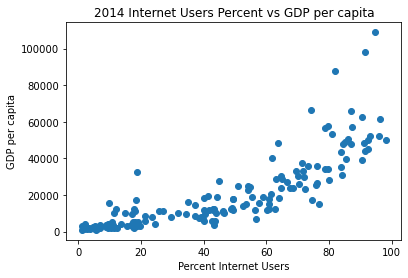

In [48]:
plt.scatter(x = 'Internet_Users_Pct', y ='GDP_Per_Capita', data = gdp_internet_2014_ss)
plt.xlabel('Percent Internet Users')
plt.ylabel('GDP per capita')
plt.title('2014 Internet Users Percent vs GDP per capita');

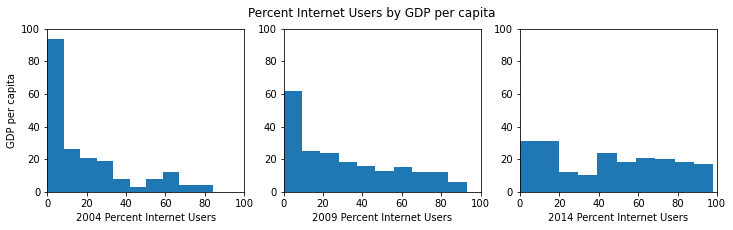

In [49]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.hist(gdp_internet_2004_ss.Internet_Users_Pct)
plt.xlabel('2004 Percent Internet Users')
plt.ylabel('GDP per capita')
plt.axis([0, 100, 0, 100])

plt.subplot(132)
plt.hist(gdp_internet_2009_ss.Internet_Users_Pct)
plt.xlabel('2009 Percent Internet Users')
plt.axis([0, 100, 0, 100])

plt.subplot(133)
plt.hist(gdp_internet_2014_ss.Internet_Users_Pct)
plt.xlabel('2014 Percent Internet Users')
plt.axis([0, 100, 0, 100])

plt.suptitle('Percent Internet Users by GDP per capita')
plt.show()

I found the scatterplots very interesting. In 2004 there was a definite trend line that the higher the GDP the higher the percentage of internet users. The trend from 2004 to 2014, over the next ten years, was a significant flatting on the line. Also there did not seem to be as big of a shift from left to the right of the plot as I would have expected. I guess I can also say there does not also seem to as much of a shift from the bottom of the plot upward as I would have liked to see. Overall I think this indicates a slower rate of internet adoption and of economic growth than one might have hoped for.

Later I added the histograms and there does seem to be a significant shift towards more countries having more users on the Internet. Still with a large number below 20% however.

Both percentage of internet use and GDP per capita appear to be unimodal for 2014.

In [50]:
cl = list(gdp_internet_2014_ss.nlargest(5, 'Internet_Users_Pct')["Country"])

In [51]:
dfs = [gdp_internet_2004_ss, gdp_internet_2009_ss, gdp_internet_2014_ss]

In [52]:
gdp_internet_2014_ss.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
2507,Iceland,2014,49911.069825,98.16,both
6649,Bermuda,2014,NaN,96.80,right_only
4461,Norway,2014,61308.763730,96.30,both
1374,Denmark,2014,52172.606425,95.99,both
6609,Andorra,2014,NaN,95.90,right_only


In [53]:
gdp_internet_2009_ss.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
2512,Iceland,2009,48428.312438,93.00,both
4466,Norway,2009,60620.334503,92.08,both
5780,Sweden,2009,46185.526525,91.00,both
4263,Netherlands,2009,51850.500537,89.63,both
3540,Luxembourg,2009,105077.951508,87.31,both


In [54]:
gdp_internet_2004_ss.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
5785,Sweden,2004,45029.814344,83.89,both
2517,Iceland,2004,45380.965464,83.88,both
1384,Denmark,2004,50566.988088,80.93,both
4471,Norway,2004,59647.501415,77.69,both
7159,Korea (Rep. of),2004,NaN,72.70,right_only


In [55]:
top_5_internet = gdp_internet_2014_ss.nlargest(5, 'Internet_Users_Pct')
list(top_5_internet["Country"])

['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']

In [56]:
top_5_internet = top_5_internet.append(gdp_internet_2009_ss[gdp_internet_2009_ss['Country'].isin(top_5_internet['Country'])])
top_5_internet = top_5_internet.append(gdp_internet_2004_ss[gdp_internet_2004_ss['Country'].isin(top_5_internet['Country'])])

In [57]:
top_5_internet.sort_values(by=["Year", "Country"], ascending=True, inplace=True)
top_5_internet.reset_index(drop=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
0,Andorra,2004,NaN,26.837954,right_only
1,Bermuda,2004,NaN,60.990867,right_only
2,Denmark,2004,50566.988088,80.930000,both
3,Iceland,2004,45380.965464,83.880000,both
4,Norway,2004,59647.501415,77.690000,both
5,Andorra,2009,NaN,78.530000,right_only
6,Bermuda,2009,NaN,83.250000,right_only
7,Denmark,2009,50233.702688,86.840000,both
8,Iceland,2009,48428.312438,93.000000,both
9,Norway,2009,60620.334503,92.080000,both


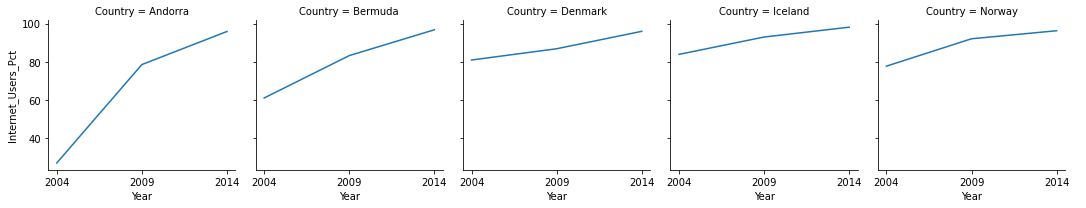

In [58]:
g = sns.FacetGrid(top_5_internet, col="Country")
g.map(sns.lineplot, "Year", 'Internet_Users_Pct')
g.add_legend()

Andorra had the fastest percentage rise of Internet users.

In [61]:
bot_5_internet = gdp_internet_2014_ss.nsmallest(5, 'Internet_Users_Pct')
list(bot_5_internet["Country"])

["Dem. People's Rep. of Korea", 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia']

In [62]:
bot_5_internet = bot_5_internet.append(gdp_internet_2009_ss[gdp_internet_2009_ss['Country'].isin(bot_5_internet['Country'])])
bot_5_internet = bot_5_internet.append(gdp_internet_2004_ss[gdp_internet_2004_ss['Country'].isin(bot_5_internet['Country'])])

In [63]:
bot_5_internet.sort_values(by=["Year", "Country"], ascending=True, inplace=True)
bot_5_internet.reset_index(drop=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
0,Burundi,2004,817.460585,0.349060,both
1,Dem. People's Rep. of Korea,2004,NaN,0.000000,right_only
2,Somalia,2004,NaN,1.053455,right_only
3,Timor-Leste,2004,2258.707771,NaN,left_only
4,Burundi,2009,831.564131,0.900000,both
5,Dem. People's Rep. of Korea,2009,NaN,0.000000,right_only
6,Eritrea,2009,NaN,0.540000,right_only
7,Somalia,2009,NaN,1.160611,right_only
8,Timor-Leste,2009,2724.834868,0.185252,both
9,Burundi,2014,886.235777,1.380000,both


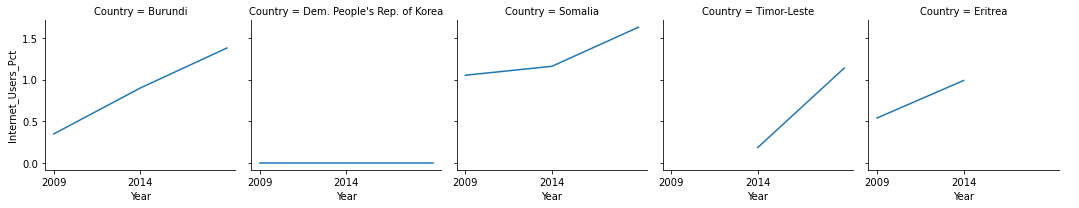

In [65]:
g = sns.FacetGrid(bot_5_internet, col="Country")
g.map(sns.lineplot, "Year", 'Internet_Users_Pct')
g.add_legend()

The country with consistently the lowest percentage of Internet users is the Democratic People's Republic
of Korea.

In [66]:
top_5_gdp = gdp_internet_2014_ss.nlargest(5, 'GDP_Per_Capita')
list(top_5_gdp["Country"])

['Macao SAR, China', 'Luxembourg', 'Qatar', 'Singapore', 'Cayman Islands']

In [67]:
top_5_gdp = top_5_gdp.append(gdp_internet_2009_ss[gdp_internet_2009_ss['Country'].isin(top_5_gdp['Country'])])
top_5_gdp = top_5_gdp.append(gdp_internet_2004_ss[gdp_internet_2004_ss['Country'].isin(top_5_gdp['Country'])])

In [68]:
top_5_gdp.sort_values(by=["Year", "Country"], ascending=True, inplace=True)
top_5_gdp.reset_index(drop=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
0,Luxembourg,2004,102850.273309,65.880000,both
1,"Macao SAR, China",2004,72944.409424,NaN,left_only
2,Qatar,2004,98423.340291,20.701648,both
3,Singapore,2004,63901.716368,62.000000,both
4,Cayman Islands,2009,70287.622992,64.500000,both
5,Luxembourg,2009,105077.951508,87.310000,both
6,"Macao SAR, China",2009,95939.340822,NaN,left_only
7,Qatar,2009,94440.370835,53.100000,both
8,Singapore,2009,69466.581746,69.000000,both
9,Cayman Islands,2014,66195.475587,74.100000,both


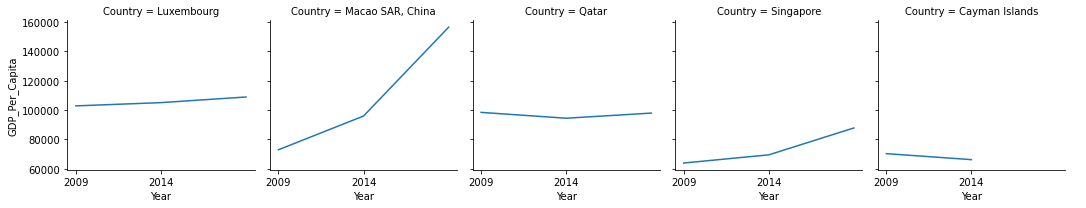

In [70]:
g = sns.FacetGrid(top_5_gdp, col="Country")
g.map(sns.lineplot, "Year", 'GDP_Per_Capita')
g.add_legend()

In [73]:
bot_5_gdp = gdp_internet_2014_ss.nsmallest(5, 'GDP_Per_Capita')
list(bot_5_gdp["Country"])

['Central African Republic', 'Burundi', 'Malawi', 'Dem. Rep. Congo', 'Niger']

In [74]:
bot_5_gdp = bot_5_gdp.append(gdp_internet_2009_ss[gdp_internet_2009_ss['Country'].isin(bot_5_gdp['Country'])])
bot_5_gdp = bot_5_gdp.append(gdp_internet_2004_ss[gdp_internet_2004_ss['Country'].isin(bot_5_gdp['Country'])])

In [75]:
bot_5_gdp.sort_values(by=["Year", "Country"], ascending=True, inplace=True)
bot_5_gdp.reset_index(drop=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,_merge
0,Burundi,2004,817.460585,0.349060,both
1,Central African Republic,2004,1037.846766,NaN,left_only
2,Dem. Rep. Congo,2004,757.685942,NaN,left_only
3,Malawi,2004,775.346132,0.347505,both
4,Niger,2004,931.536282,0.189934,both
5,Burundi,2009,831.564131,0.900000,both
6,Central African Republic,2009,1161.189475,NaN,left_only
7,Dem. Rep. Congo,2009,835.611696,NaN,left_only
8,Malawi,2009,932.867635,1.070000,both
9,Niger,2009,990.354227,0.760000,both


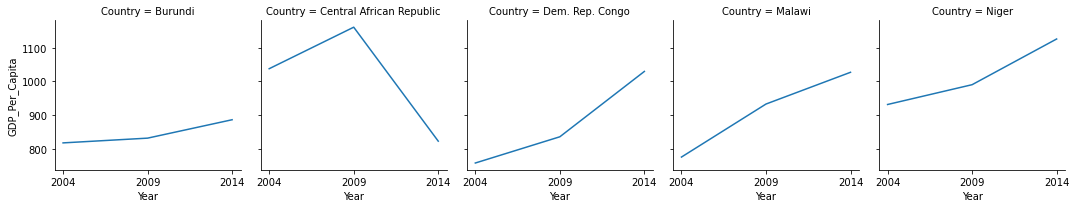

In [76]:
g = sns.FacetGrid(bot_5_gdp, col="Country")
g.map(sns.lineplot, "Year", 'GDP_Per_Capita')
g.add_legend()

There is a notable drop in GDP in the Central African Republic from 2009 to 2014. A civil war in 2012 might 
be the reason for this drop.